In [1]:
#! /usr/bin/env python
# -*- encoding: UTF-8 -*-

"""Example: Shows how images can be accessed through ALVideoDevice"""

import qi
from naoqi import ALProxy
import sys
import time
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import time

In [7]:
start = time.time()
nao_ip = '192.168.0.38'

video_service = ALProxy("ALVideoDevice" ,nao_ip, 9559)

cameraindex = 0
resolution = 2  # Image of 640*480px
colorSpace = 13  # AL::kYuvColorSpace
fps = 20

nameId = video_service.subscribeCamera("topcamera", cameraindex, resolution, colorSpace, fps)
img_data = video_service.getImageRemote(nameId)

video_service.unsubscribe(nameId)
print(time.time()-start)

0.277402877808


In [8]:
nameId = video_service.subscribeCamera("topcamera", cameraindex, resolution, colorSpace, fps)
nameId

'topcamera_2'

In [11]:
data_array = np.frombuffer(img_data[6], dtype=np.uint8)
img = np.reshape(data_array, (img_data[1], img_data[0], img_data[2]))

(480, 640, 3)


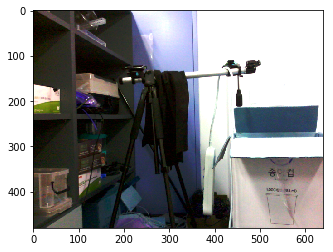

In [12]:
#test = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
test = img
cv2.imwrite("test.png",test)
print test.shape
plt.imshow(test)
plt.show()